In [3]:
cd ~/data/modl_data/pipeline/contrast/prediction/2/

/storage/store/work/amensch/data/modl_data/pipeline/contrast/prediction/2


In [4]:
from sklearn.externals.joblib import load
from sklearn.pipeline import Pipeline
import pandas as pd

from nilearn.input_data import MultiNiftiMasker
from nilearn.datasets import load_mni152_brain_mask
from modl.datasets.hcp import fetch_hcp

In [5]:
def plot_confusion_matrix(conf_arr, labels):

    fig = plt.figure(figsize=(8, 8))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    
    S = conf_arr.sum(axis=0)
    S[S == 0] = 1
    conf_arr = conf_arr / S
    
    res = ax.imshow(conf_arr,
                interpolation='nearest')

    width, height = conf_arr.shape

    plt.xticks(range(width))
    plt.yticks(range(height))
    ax.set_yticklabels(labels)
    ax.set_xticklabels(labels, rotation=90)
    fig.colorbar(res)
    
def plot_gram_matrix(G, labels):
    fig = plt.figure(figsize=(8, 8))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(G,
                interpolation='nearest')

    width, height = G.shape

    plt.xticks(range(width))
    plt.yticks(range(height))
    ax.set_yticklabels(labels)
    ax.set_xticklabels(labels, rotation=90)
    fig.colorbar(res)

In [6]:
cd _artifacts

/storage/store/work/amensch/data/modl_data/pipeline/contrast/prediction/2/_artifacts


In [7]:
from modl.fixes import OurModel
estimator = load('estimator.pkl')
label_encoder = load('label_encoder.pkl')
prediction = pd.read_csv('prediction.csv')

pipeline = Pipeline(estimator.steps[:-1])

Using TensorFlow backend.


In [39]:
model = estimator.steps[-1][1].stacked_model_

supervised_layers =  model.layers_by_depth[2]
embedding_layer =  model.layers_by_depth[3][0]

w0 = []
for layer in supervised_layers:
    this_w0, this_b0 = layer.get_weights()
    w0.append(this_w0)
w0 = np.concatenate(w0, axis=1)
w1 = embedding_layer.get_weights()[0]

coef = w1.dot(w0).T
intercept = b0

NameError: name 'estimator' is not defined

In [40]:
print('Sparsity', (coef == 0).sum() / coef.size)

NameError: name 'coef' is not defined

In [41]:
pipeline.named_steps['feature_importance'].feature_importance[:] = 1
maps = pipeline.inverse_transform(coef)

mask = fetch_hcp(n_subjects=1).mask
masker = MultiNiftiMasker(mask_img=mask).fit()
imgs = masker.inverse_transform(maps)

print('Shape', imgs.shape)

NameError: name 'pipeline' is not defined

In [8]:
match = prediction['true_label'] == prediction['predicted_label']
prediction = prediction.assign(match=match)
prediction.set_index(['fold', 'dataset', 'subject', 'task', 'contrast', 'direction'], inplace=True)
prediction.sort_index(inplace=True)
datasets = prediction.index.get_level_values('dataset').unique().values

In [9]:
labels_list = []
tasks_list = []
for dataset in datasets:
    first_subject = prediction.loc['test', dataset].index.get_level_values('subject')[0]
    data = prediction.loc[('test', dataset, first_subject)]
    labels = data.index.get_level_values('contrast').values
    tasks = data.index.get_level_values('task').values
    labels_list.append(labels)
    tasks_list.append(tasks)
labels = np.concatenate(labels_list)
tasks = np.concatenate(tasks_list)

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
train_conf = confusion_matrix(prediction.loc['train', 'true_label'],
                        prediction.loc['train', 'predicted_label'], labels=labels)
test_conf = confusion_matrix(prediction.loc['test', 'true_label'],
                        prediction.loc['test', 'predicted_label'], labels=labels)

In [12]:
plot_confusion_matrix(test_conf, labels)

In [13]:
test_conf.shape

(53, 53)

In [19]:
cd ..

/storage/store/work/amensch/data/modl_data/pipeline/contrast/prediction/2


In [20]:
ls

_artifacts/  config.json  cout.txt  info.json  prediction.csv  run.json


In [21]:
import json
info = json.load(open('info.json', 'r'))

In [36]:
prediction.query("dataset == 'archi'")

predicted_label  \
fold  dataset subject task      contrast             direction                         
test  archi   5       emotional expression_control   level1           expression_sex   
                                expression_intention level1     expression_intention   
                                expression_sex       level1           expression_sex   
                                face_control         level1           expression_sex   
                                face_sex             level1           expression_sex   
                                face_trusty          level1           expression_sex   
                      localizer audio                level1                    audio   
                                calculaudio          level1              calculaudio   
                                calculvideo          level1              calculvideo   
                                clicDaudio           level1               clicDaudio   
                                clicDvideo           level1               clicDvideo   
                                clicGaudio           level1               clicGaudio   
                                clicGvideo           level1               clicGvideo   
                                computation          level1              computation   
                                damier_H             level1                 damier_H   
                                damier_V             level1                 damier_V   
                                motor-cognitive      level1          motor-cognitive   
                      parietal  object_grasp         level1               clicDvideo   
                                object_orientation   level1               clicDaudio   
                                rotation_hand        level1            rotation_hand   
                                rotation_side        level1          triangle_random   
                                saccade              level1          triangle_random   
                      social    false_belief_audio   level1       false_belief_audio   
                                false_belief_video   level1     expression_intention   
                                mecanistic_audio     level1         mecanistic_audio   
                                mecanistic_video     level1         mecanistic_audio   
                                non_speech           level1               non_speech   
                                speech               level1               clicDaudio   
                                triangle_intention   level1       triangle_intention   
                                triangle_random      level1          triangle_random   
...                                                                              ...   
train archi   7       emotional expression_control   level1       expression_control   
                                expression_intention level1     expression_intention   
                                expression_sex       level1           expression_sex   
                                face_control         level1             face_control   
                                face_sex             level1                 face_sex   
                                face_trusty          level1              face_trusty   
                      localizer audio                level1                    audio   
                                calculaudio          level1              calculaudio   
                                calculvideo          level1              calculvideo   
                                clicDaudio           level1               clicDaudio   
                                clicDvideo           level1               clicDvideo   
                                clicGaudio           level1               clicGaudio   
                                clicGvideo           level1               clicGvideo   
                     

In [37]:
test = info['test']['values']

In [50]:
len(prediction.loc['test', 'archi'].index.get_level_values('subject').unique())

1

In [51]:
len(prediction.loc['train', 'archi'].index.get_level_values('subject').unique())

6

In [26]:
info['train']['values']

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [15]:
prediction['match'].groupby(level=['fold', 'dataset', 'task', 'contrast']).apply(np.mean)['test']

dataset  task        contrast            
archi    emotional   expression_control      0.000000
                     expression_intention    1.000000
                     expression_sex          1.000000
                     face_control            0.000000
                     face_sex                0.000000
                     face_trusty             0.000000
         localizer   audio                   1.000000
                     calculaudio             1.000000
                     calculvideo             1.000000
                     clicDaudio              1.000000
                     clicDvideo              1.000000
                     clicGaudio              1.000000
                     clicGvideo              1.000000
                     computation             1.000000
                     damier_H                1.000000
                     damier_V                1.000000
                     motor-cognitive         1.000000
         parietal    object_grasp       

In [16]:
prediction['match'].groupby(level=['fold', 'dataset']).apply(np.mean)

fold   dataset
test   archi      0.633333
       hcp        0.984496
train  archi      1.000000
       hcp        0.995204
Name: match, dtype: float64

In [92]:
plt.show()

In [707]:
titles = ["%s: %s" % (task, contrast) for task, contrast in zip(tasks, labels)]

In [ ]:
%matplotlib inline
from nilearn.plotting import plot_stat_map
from nilearn.image import index_img
from nilearn._utils import check_niimg

indices = label_encoder.transform(labels)

imgs = check_niimg(imgs)
imgs.get_data()

plt.close('all')

for i, title in zip(indices, titles):
    plot_stat_map(index_img(imgs, i), title=title, threshold=0)

KeyboardInterrupt: 

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/home/parietal/amensch/opt/miniconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/parietal/amensch/opt/miniconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/parietal/amensch/opt/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/parietal/amensch/opt/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/parietal/amensch/opt/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/parietal/amensch/opt/miniconda3/lib/python3.6/site-packages/ipykernel/ipkernel

In [ ]:
indices = label_encoder.transform(labels)
ncoef = coef[indices]
S = np.sqrt((ncoef ** 2).sum(axis=1))
ncoef = ncoef / S[:, np.newaxis]

In [ ]:
G = ncoef.dot(ncoef.T)
plot_gram_matrix(G, labels)

In [619]:
np.mean(w0 == 0),np.mean(w1 == 0)

(0.0, 0.0)

In [620]:
np.histogram(w1)

(array([   34,   223,  1099,  4358,  8492, 10087,  6574,  2116,   493,   124]),
 array([ -5.41468558e-04,  -4.37985052e-04,  -3.34501546e-04,
         -2.31018040e-04,  -1.27534533e-04,  -2.40510271e-05,
          7.94324791e-05,   1.82915985e-04,   2.86399492e-04,
          3.89882998e-04,   4.93366504e-04]))

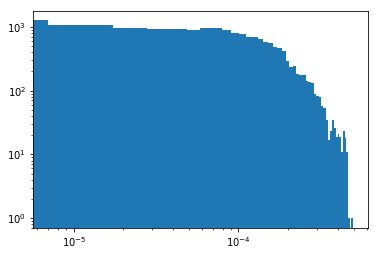

In [623]:
%matplotlib inline
n, bins, patches = plt.hist(w1.ravel(), bins=100, log=True)
plt.xscale('log')

In [ ]:
w1.ravel()[:300]

In [ ]:
(np.abs(coef[indices,:16]).sum())

In [ ]:
(np.abs(coef[indices,16:80])).sum()

In [ ]:
np.abs(coef[indices,80:80 + 256]).sum()

In [ ]:
np.mean(coef[indices, :16] == 0)

In [ ]:
np.mean(coef[indices, 16:80] == 0)

In [ ]:
np.mean(coef[indices, 80:256] == 0)